# NFL 2020 Forecasting Yards Gained

> “The running back takes the handoff… he breaks a tackle…spins… and breaks free! One man to beat! Past the 50-yard-line! To the 40! The 30! He! Could! Go! All! The! Way!”

But will he?

American football is a complex sport. From the 22 players on the field to specific characteristics that ebb and flow throughout the game, it can be challenging to quantify the value of specific plays and actions within a play. Fundamentally, the goal of football is for the offense to run (rush) or throw (pass) the ball to gain yards, moving towards, then across, the opposing team’s side of the field in order to score. And the goal of the defense is to prevent the offensive team from scoring.

In the National Football League (NFL), roughly a third of teams’ offensive yardage comes from run plays. Ball carriers are generally assigned the most credit for these plays, but their teammates (by way of blocking), coach (by way of play call), and the opposing defense also play a critical role. Traditional metrics such as ‘yards per carry’ or ‘total rushing yards’ can be flawed; in this competition, the NFL aims to provide better context into what contributes to a successful run play.

As an “armchair quarterback” watching the game, you may think you can predict the result of a play when a ball carrier takes the handoff - but what does the data say? Deeper insight into rushing plays will help teams, media, and fans better understand the skill of players and the strategies of coaches. It will also assist the NFL and its teams evaluate the ball carrier, his teammates, his coach, and the opposing defense, in order to make adjustments as necessary.

**National Football League**

[Offense](https://operations.nfl.com/football-101/formations-101/)
<br> 11 players who try to move the football down the field to either get into its opponent's end zone or get close enough to attempt to kick a field goal.
- **QB** Quarterback: leads the offense and calls the plays, leads team down the field by running with the ball, handing the ball off or completing a forward pass to an eligible receiver (Wide Receiver, Running Back, Fullback, Tight End)
- **RB** Running Back (halfback or tailback): primary ball carrier who runs with the ball, tries to catch a pass, or remains in the backfield to block for the quarterback
- **FB** Fullback: blocks for the running back or quarterback, carry the ball when a strong running style is needed (e.g. when offense only needs to gain a few yards for a first down or to score a touchdown)
- **RB** Wide Receiver: known for speed and ability to catch the ball; lines up close to the sidelines and runs downfield to catch passes from the quarterback
- **TE** Tight End: lines up on the end of the offensive line as an extra blocker on running plays or a receiver in passing plays
- Linemen: heroes of offense
    - **C** Center: lines up in middle and snaps football between his legs to the quarterback to start each play, communicating the blocking scheme to other linemen
    - **G** Guard: lines up on either side of center blocks oncoming defenders on passing plays or tries to open running lanes for the running back on rushing plays
    - **T** Tackles: lines up outside the guards, joining in pass protection and run blocking

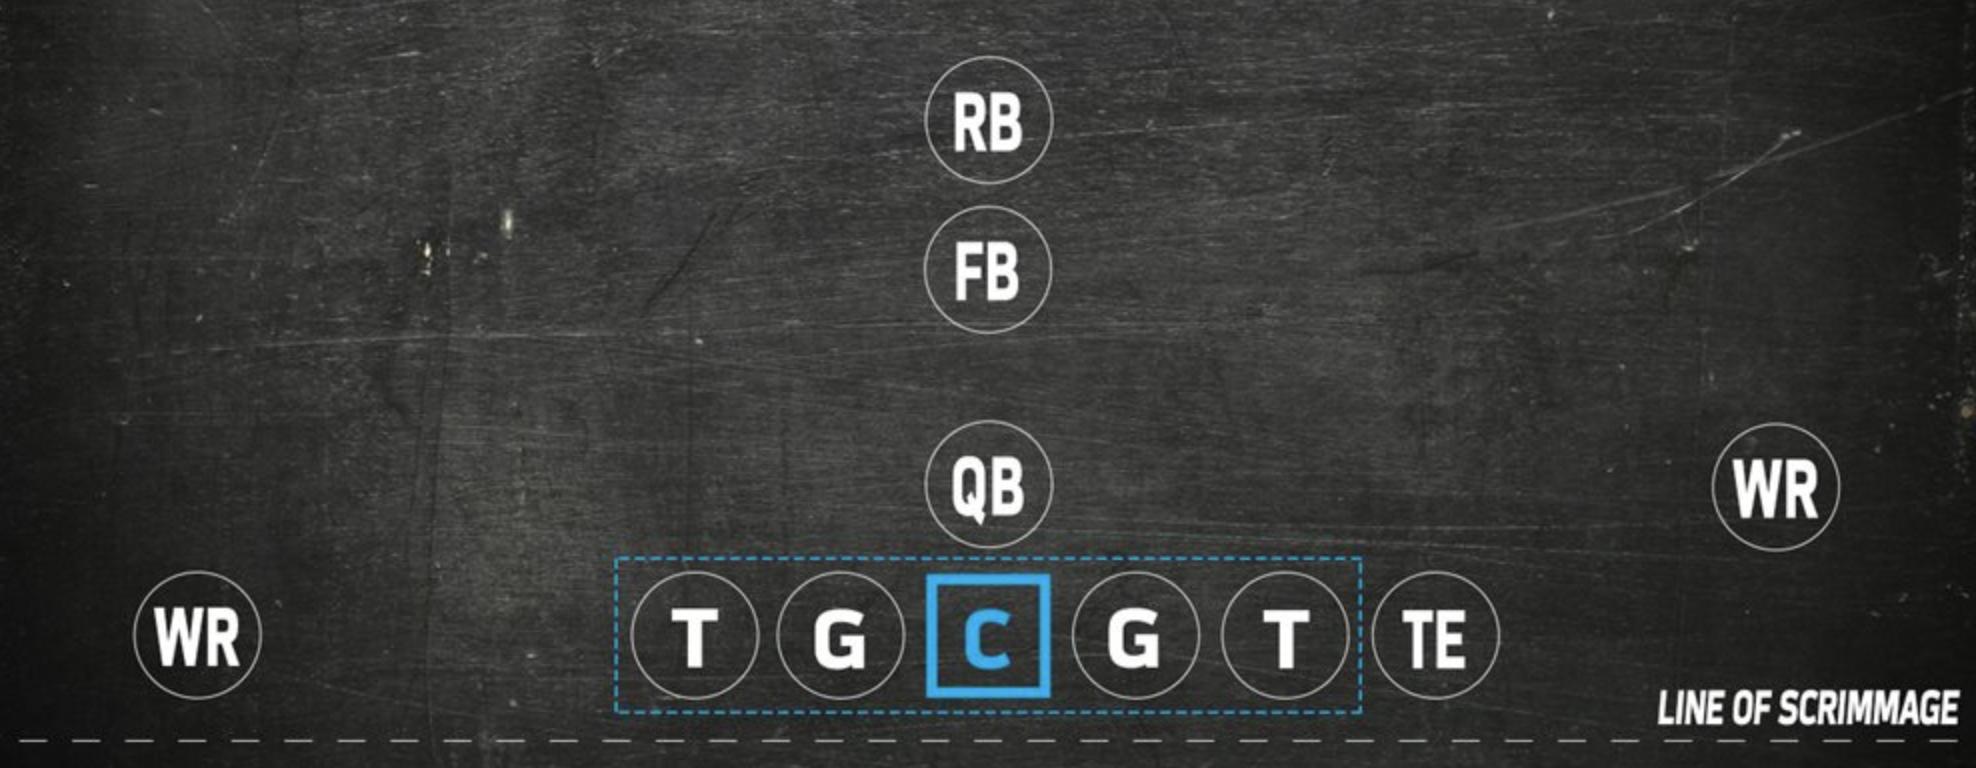

[Offense Formations](https://protips.dickssportinggoods.com/sports-and-activities/football/football-101-football-formations)
- SINGLEBACK: uses one Running Back behind the Quarterback, lined up directly behind or offset to either side
- SHOTGUN: Quarterback positions himself about 5-7 yards behind the line of scrimmage, requiring the Center to throw the ball
- I_FORM: 2 Wide Receivers, 2 Running Backs, 1 Tight End; Running Backs behind the quarterback, one behind the other, resembling an "i" dotted by the Quarterback; Wide Receivers split out wide with one on the line of scrimmage and one off the line of scrimmage; Tight End is next to a tackle (side with the Tight End is called the strong side with the opposite side being the weak side)
- PISTOL: Quarterback lines up 4 yards behind the center
- JUMBO (GOAL LINE): used in short-yardage situations, especially near the goal line, to score by brute force; 3 Tight Ends, 2 Running Backs and no Wide Receivers (or 2 Tight Ends and 3 Running Backs with no Wide Receivers)
- WILDCAT: running back or receiver who runs well takes the place of the Quarterback in a shotgun formation while the Quarterback lines up wide or is replaced by another player
- EMPTY: all of the backs play near the line of scrimmage as extra wide receivers or tight ends

[Defense](https://operations.nfl.com/football-101/formations-101/)
<br> 11 players who try to keep the offense from advancing down the field and scoring.
- Defensive line:
    - **DT** Defensive Tackles and **DE** Defensive Ends: line up opposite the offensive linemen and try to push their way across the line of scrimmage (line of play) into the offensive backfield to disrupt or stop a play at or near the line of scrimmage, tackle the ball carrier on rushing plays or rush the quarterback.
- **LB** Linebacker: positioned 3-5 yards behind the defensive line and supports the defensive line by tackling the ball carrier, dropping into pass coverage or rushing the quarterback.
- Secondary (Defensive Backs):
    - **CB** Cornerback: lines up near the line opposite wide receivers
    - **S** Safety: positioned 10-15 yards downfield, last line of defense between the offense and the end zone.
    - pursue the ball carrier and sometimes rush the quarterback

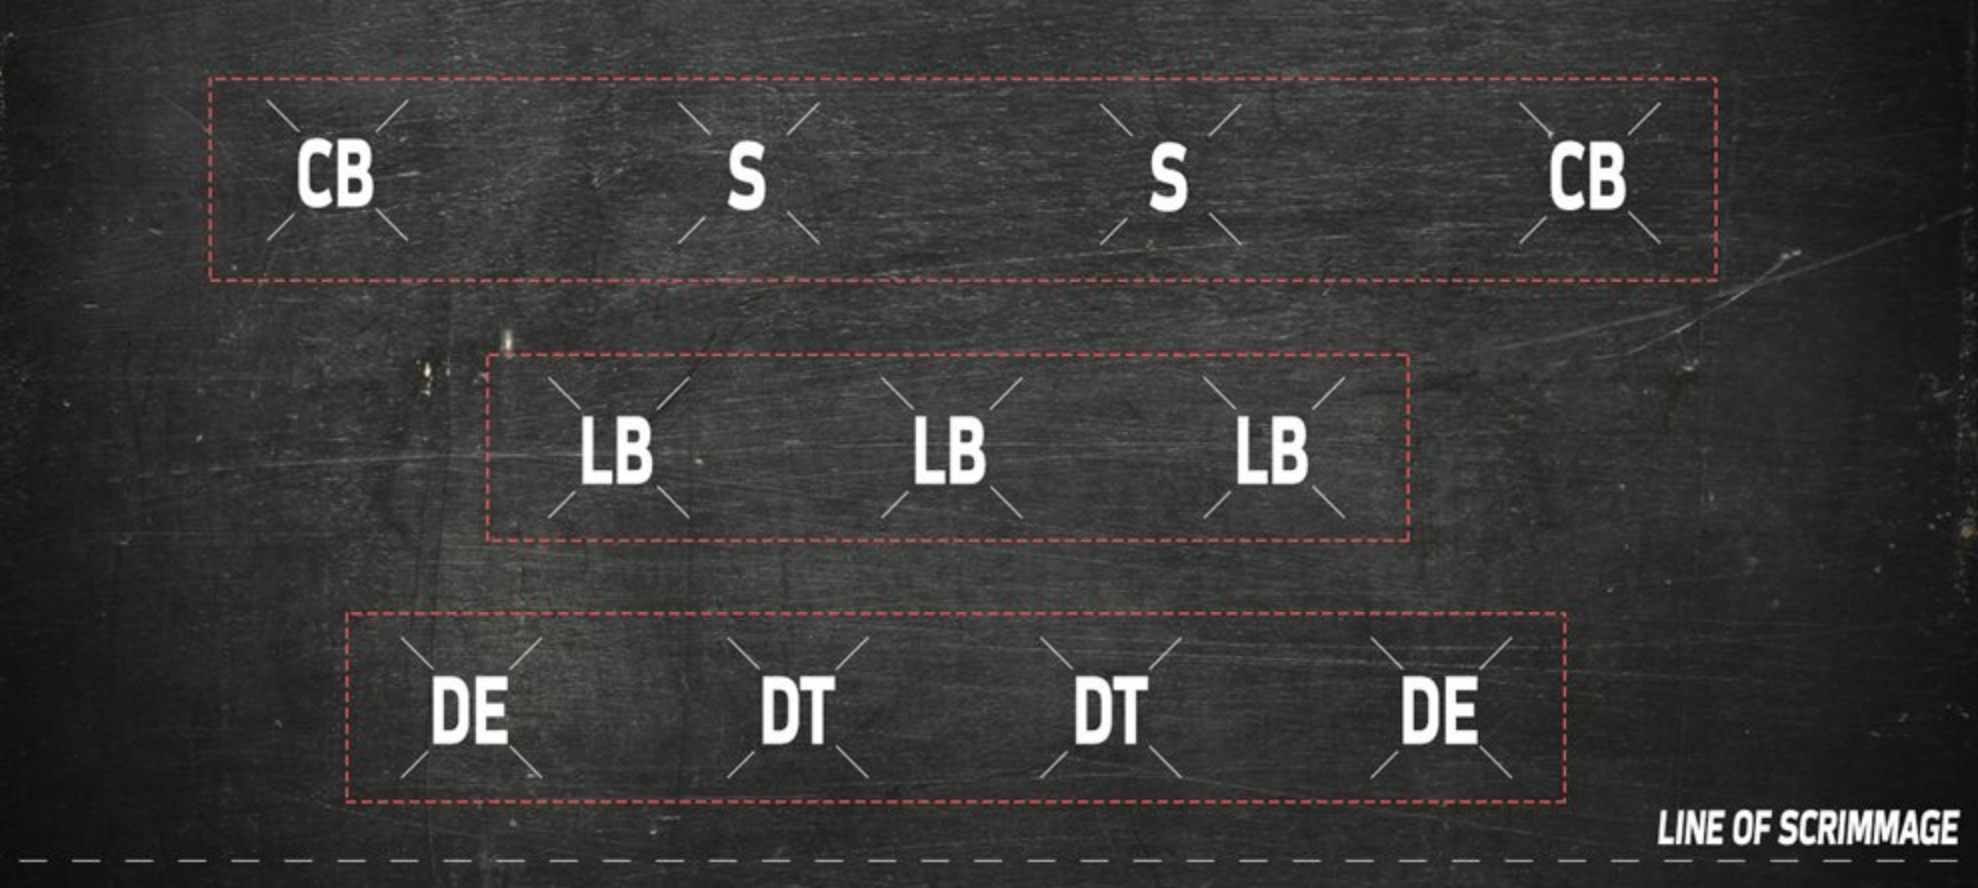

Each row in the file corresponds to a single player's involvement in a single play.

Features:
*Team information*
- Team - home or away
- HomeTeamAbbr - home team abbreviation
- VisitorTeamAbbr - visitor team abbreviation
- HomeScoreBeforePlay - home team score before play started
- VisitorScoreBeforePlay - visitor team score before play started

*Player information*
- DisplayName - player's name
- Position - the player's position (the specific role on the field that they typically play)
- PlayerHeight - player height (ft-in)
- PlayerWeight - player weight (lbs)

*Stadium information*
- StadiumType - description of the stadium environment
- Turf - description of the field surface

*Game information*
- Season - year of the season
- Week - week into the season
- GameWeather - description of the game weather
- Temperature - temperature (deg F)
- Humidity - humidity
- WindSpeed - wind speed in miles/hour
- WindDirection - wind direction

*Play information*
- X - player position along the long axis of the field. See figure below.
- Y - player position along the short axis of the field. See figure below.
- S - speed in yards/second
- A - acceleration in yards/second^2
- Dis - distance traveled from prior time point, in yards
- Orientation - orientation of player (deg)
- Dir - angle of player motion (deg)
- YardLine - the yard line of the line of scrimmage
- Quarter - game quarter (1-5, 5 == overtime)
- GameClock - time on the game clock
- PossessionTeam - team with possession
- Down - the down (1-4)
- Distance - yards needed for a first down
- FieldPosition - which side of the field the play is happening on
- OffenseFormation - offense formation
- OffensePersonnel - offensive team positional grouping
- DefendersInTheBox - number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
- DefensePersonnel - defensive team positional grouping
- PlayDirection - direction the play is headed
- Yards - the yardage gained on the play (you are predicting this)

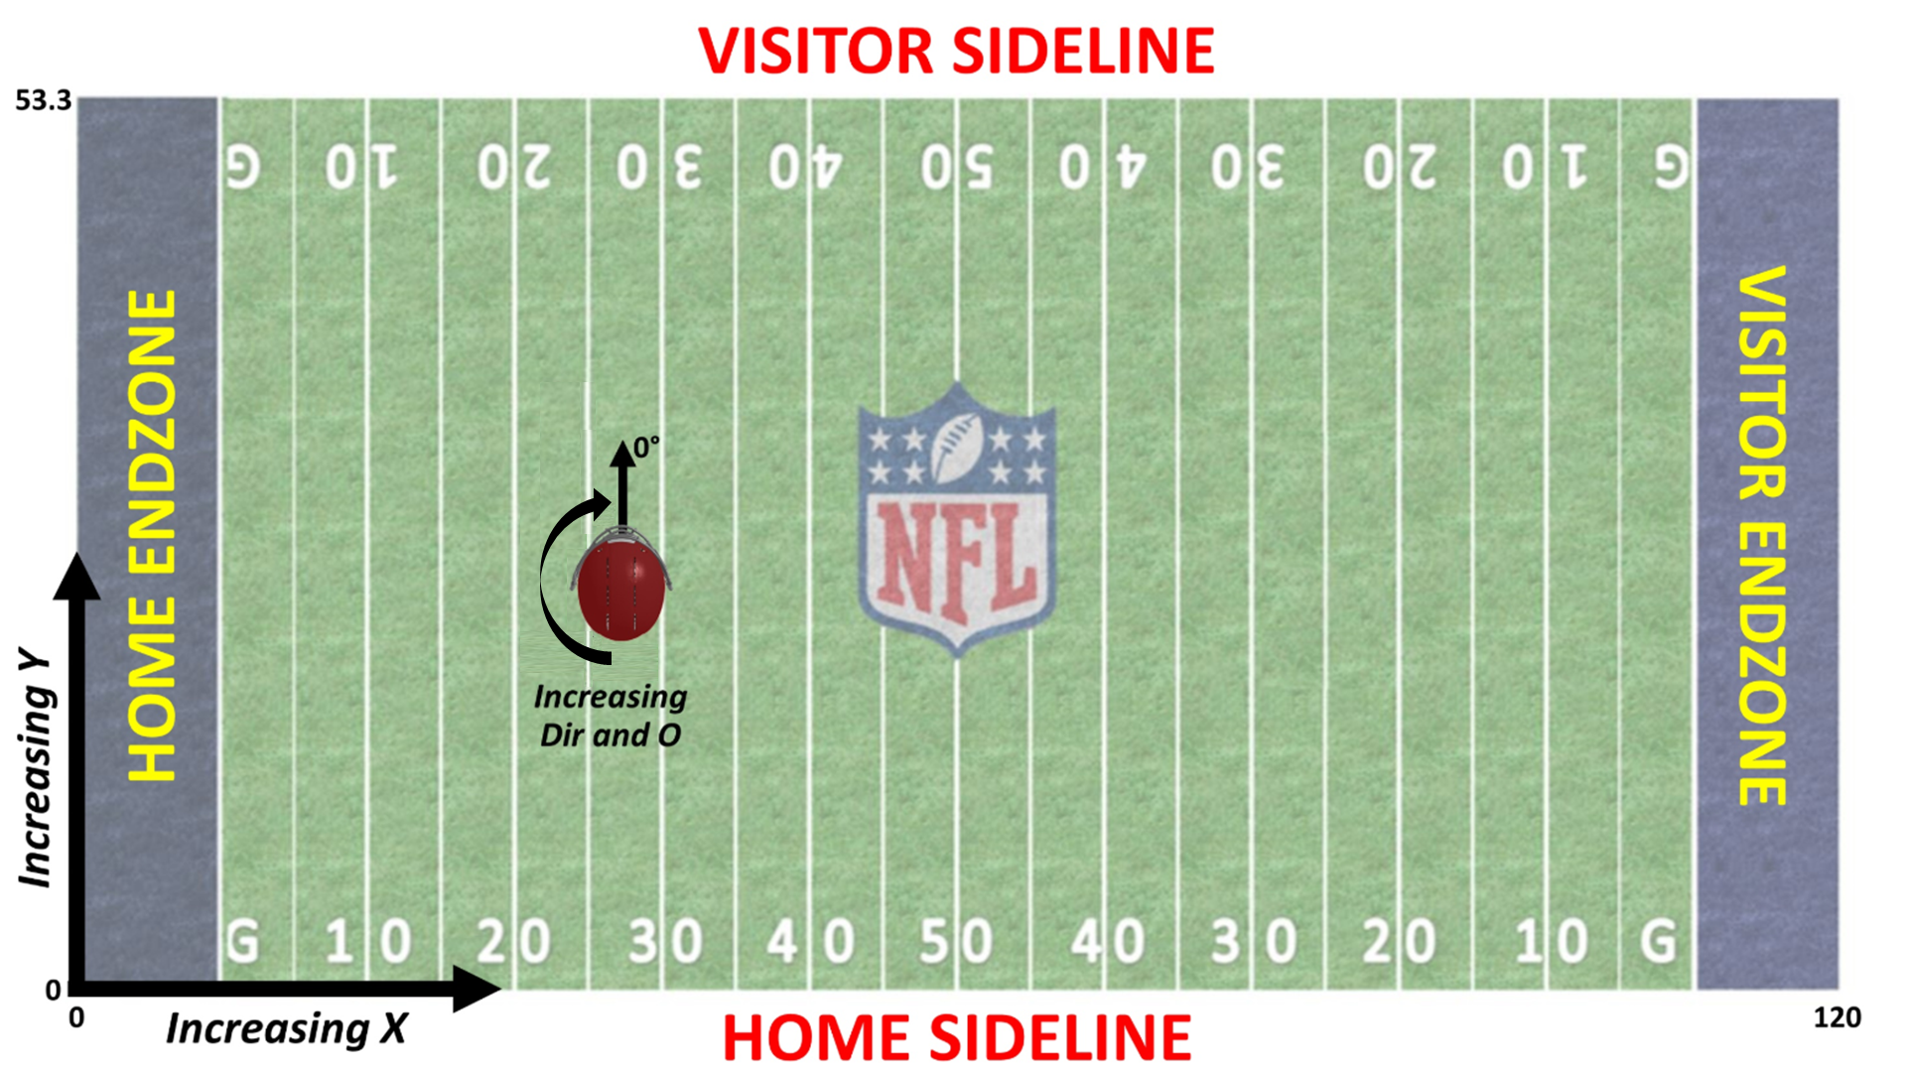

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from string import punctuation
from helper import *
from visualizations import *
%load_ext autoreload
%autoreload 2

## Data Cleaning

**Read Data**

In [2]:
nfl = pd.read_csv('Data/train.csv', dtype={'Season': str})
nfl.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir  ...  Week           Stadium        Location  \
0        81.99  177.18  ...     1  Gillette Stadium  Foxborough, MA   
1        27.61  198.70  ...     1  Gillette Stadium  Foxborough, MA   
2         3.01  202.73  ...     1  Gillette Stadium  Foxborough, MA   
3       359.77  105.64  ...     1  Gillette Stadium  Foxborough, MA   
4        12.63  164.31  ...     1  Gillette Stadium  Foxborough, MA   

  StadiumType        Turf     GameWeather Temperature Humidity  WindSpeed  \
0     Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
1     Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
2     Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
3     Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
4     Outdoor  Field Turf  Clear and warm        63.0     77.0          8   

   WindDirection  
0             SW  
1             SW  
2             SW  
3             SW  
4             SW  

[5 rows x 49 columns]

In [3]:
nfl.shape

(509762, 49)

In [4]:
nfl.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [3]:
nfl.rename(columns={'X': 'long_axis', 'Y': 'short_axis',
                   'S': 'speed', 'A': 'accel'}, inplace=True)

In [4]:
nfl_id = nfl[['GameId', 'PlayId', 'Team', 'NflId',
              'DisplayName', 'JerseyNumber', 'NflIdRusher',
              'PlayerCollegeName', 'HomeTeamAbbr',
              'VisitorTeamAbbr', 'PlayerBirthDate',
              'Stadium', 'Location']]

nfl = nfl.drop(['GameId', 'PlayId', 'NflId', 'Location',
                'JerseyNumber', 'NflIdRusher',
                'PlayerBirthDate', 'PlayerCollegeName',
                'TimeHandoff', 'TimeSnap', 'Stadium'],
               axis=1)

In [5]:
nfl = replace_null_cols(nfl)

In [6]:
nfl = rename_elements(nfl, nfl_id)

In [7]:
nfl['WindSpeed'] = nfl['WindSpeed'].apply(lambda p: give_me_WindSpeed(p))

In [8]:
nfl['GameClock'] = nfl['GameClock'].apply(strtoseconds)

In [9]:
nfl['WindDirection'] = nfl['WindDirection'].apply(clean_WindDirection)

In [10]:
nfl = organize_team_abbrs(nfl)

In [11]:
nfl['PlayerHeight'] = nfl['PlayerHeight'].apply(lambda x:
                                                12*int(x.split('-')[0])
                                                + int(x.split('-')[1]))

In [12]:
nfl['long_axis'] = nfl.apply(lambda row: row['long_axis']
                             if row['PlayDirection']
                             else 120-row['long_axis'], axis=1)

nfl['Orientation'] = nfl.apply(lambda row:
                               new_orientation(row['Orientation'],
                                               row['PlayDirection']),
                               axis=1)

nfl['Dir'] = nfl.apply(lambda row:
                       new_orientation(row['Dir'],
                                       row['PlayDirection']),
                       axis=1)

In [13]:
nfl['FieldPosition'] = nfl.apply(lambda row: 'Home'
                                 if row['FieldPosition'] == row['TeamAbbr']
                                 else 'Away', axis=1)

In [14]:
nfl['PossessionTeam'] = nfl.apply(lambda row: 'Home'
                                  if row['PossessionTeam'] == row['TeamAbbr']
                                  else 'Away', axis=1)

In [15]:
nfl['Yard_class'] = nfl['Yards'].apply(assign_yard_class)

In [16]:
nfl['GameWeather'] = nfl['GameWeather'].apply(group_weather)

In [19]:
nfl['OffenseFormation'] = nfl['OffenseFormation'].apply(lambda x: 'SINGLEBACK'
                                                        if x == 'ACE'
                                                        else x)

In [21]:
nfl.to_csv('Data/cleaned_nfl.csv', index=False)

## Exploratory Data Analysis (EDA)

In [22]:
nfl = pd.read_csv('Data/cleaned_nfl.csv')
nfl

Team  long_axis  short_axis  speed  accel   Dis  Orientation     Dir  \
0       away      73.91       34.84   1.69   1.13  0.40        81.99  177.18   
1       away      74.67       32.64   0.42   1.35  0.01        27.61  198.70   
2       away      74.00       33.20   1.22   0.59  0.31         3.01  202.73   
3       away      71.46       27.70   0.42   0.54  0.02       359.77  105.64   
4       away      69.32       35.42   1.82   2.43  0.16        12.63  164.31   
5       away      75.06       24.00   1.01   0.32  0.18       308.34   95.01   
6       away      74.11       16.64   1.11   0.83  0.02       357.23  322.59   
7       away      73.37       18.73   1.24   0.74  0.13       328.52  270.04   
8       away      56.63       26.90   0.26   1.86  0.28       344.70   55.31   
9       away      73.35       38.83   4.55   0.76  0.51        75.47  190.84   
10      away      74.15       28.90   0.72   0.73  0.01       342.58  274.14   
11      home      75.82       17.56   2.30   1.39  0.55       178.97  284.15   
12      home      74.78       33.21   1.71   0.82  0.19       178.82  215.90   
13      home      75.43       32.41   1.50   1.36  0.32       207.08  222.76   
14      home      75.90       25.12   1.38   0.80  0.19       133.01  198.55   
15      home      79.76       29.49   0.84   1.22  0.00       192.18  110.86   
16      home      76.47       36.91   5.15   0.77  0.59       112.02  195.09   
17      home      74.70       19.19   2.10   1.48  0.51       152.14  278.52   
18      home      78.75       30.53   3.63   3.35  0.38       161.98  245.74   
19      home      74.60       31.88   1.86   1.51  0.17       218.49  267.32   
20      home      74.58       29.12   1.00   0.69  0.22       169.36  242.05   
21      home      74.58       28.47   1.70   1.55  0.24       207.09  255.67   
22      away      65.73       33.88   1.53   2.16  0.20        70.30  165.70   
23      away      66.04       30.09   1.20   1.06  0.01       354.01  254.78   
24      away      66.02       31.50   0.73   0.84  0.13        34.96  218.45   
25      away      63.31       27.19   1.84   1.02  0.24       354.26  347.28   
26      away      60.51       26.51   2.79   2.67  0.28       337.47    7.72   
27      away      66.60       24.27   1.18   1.63  0.19       326.61    4.15   
28      away      65.12        9.43   2.05   1.73  0.31         4.69  247.76   
29      away      65.18       16.36   2.28   2.24  0.34       338.44  231.37   
...      ...        ...         ...    ...    ...   ...          ...     ...   
509732  home      80.62       23.88   0.46   0.33  0.04       108.28  127.18   
509733  home      84.09       25.66   1.72   0.55  0.17        30.21  359.17   
509734  home      84.23        7.77   2.26   0.36  0.22        73.19  102.30   
509735  home      84.96       24.77   2.79   1.13  0.29        71.79   19.98   
509736  home      84.90       23.78   3.74   0.84  0.38        44.13   15.99   
509737  home      84.19       26.77   1.75   0.85  0.20       110.27    9.23   
509738  home      84.36       42.29   1.56   1.58  0.15        93.31   89.70   
509739  home      81.19       23.75   4.23   2.43  0.41        66.34   41.24   
509740  away      86.64       28.20   0.21   0.89  0.04       234.21   82.18   
509741  away      90.09       42.83   3.11   2.47  0.31       175.02  130.60   
509742  away      88.22       28.05   1.08   2.78  0.11       242.66  114.87   
509743  away      85.82       30.07   1.29   1.35  0.11       205.86  247.08   
509744  away      87.48       23.67   1.13   1.88  0.11       311.08   16.33   
509745  away      99.14       29.81   1.97   1.40  0.19       256.20  248.21   
509746  away      87.86       27.40   1.35   2.17  0.12       222.14   76.87   
509747  away      87.43       27.78   2.43   1.85  0.25       242.40   13.99   
509748  away      85.86       24.68   1.93   0.88  0.21       247.92  316.90   
509749  away      87.82       21.82   2.90   2.67  0.29       295.36   40.07   
509750  

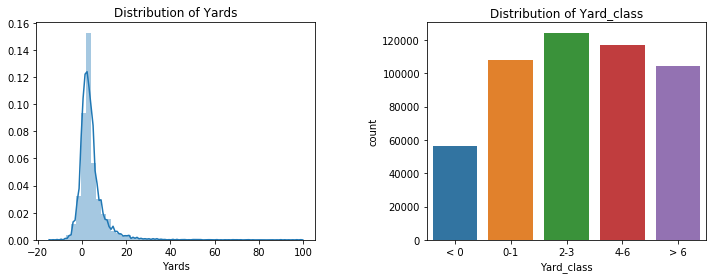

In [26]:
sort_order = ['< 0', '0-1', '2-3', '4-6', '> 6']
two_subplots(nfl, 'Yards', 'Yard_class', num_type=2,
             size=(12, 4), order=sort_order)

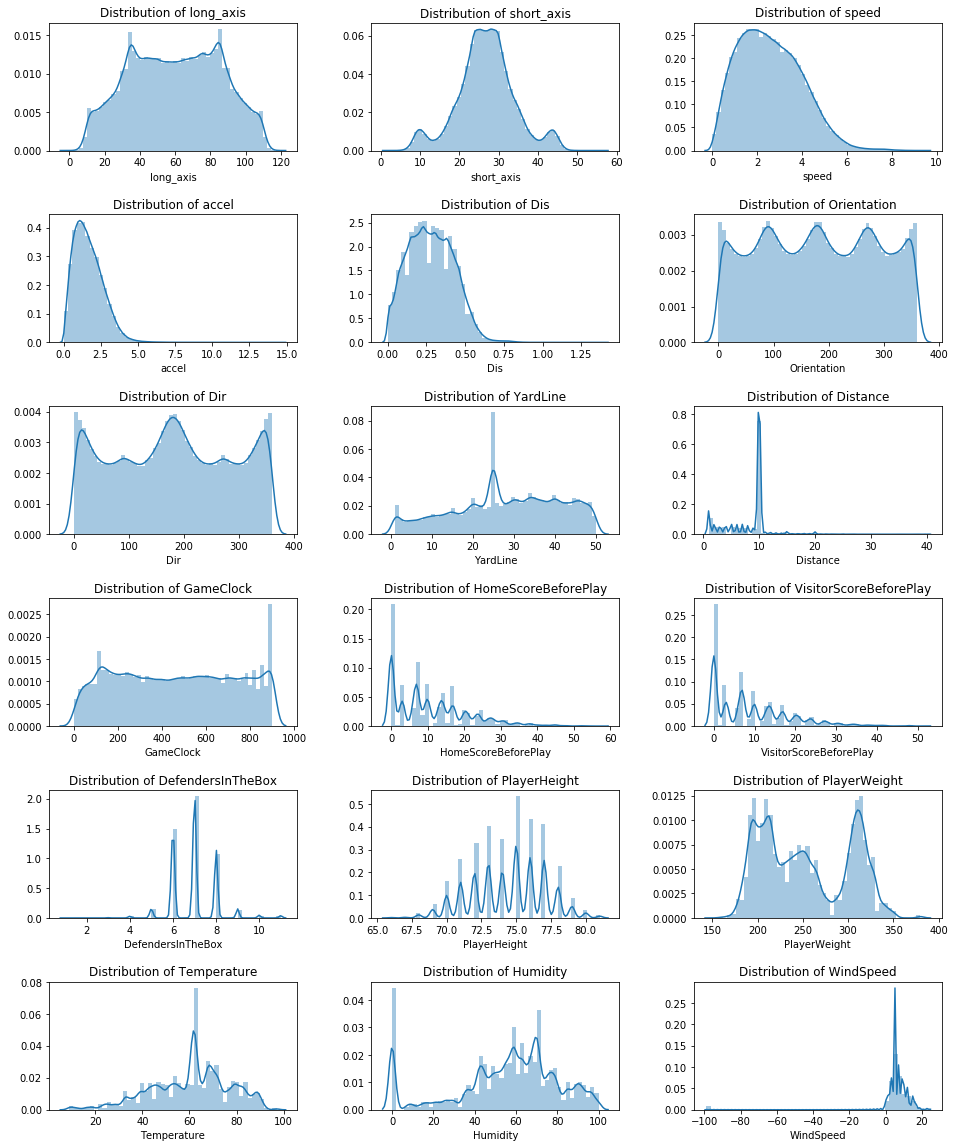

In [22]:
numeric_feats = ['long_axis', 'short_axis', 'speed', 'accel',
                 'Dis', 'Orientation', 'Dir', 'YardLine', 'Distance',
                 'GameClock', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
                 'DefendersInTheBox', 'PlayerHeight', 'PlayerWeight',
                 'Temperature', 'Humidity', 'WindSpeed']

plot_distributions(nfl, numeric_feats)

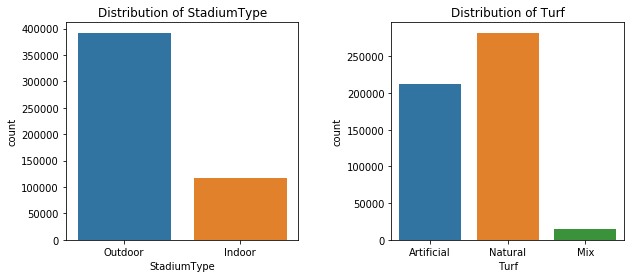

In [29]:
two_subplots(nfl, 'StadiumType', 'Turf', (10, 4));

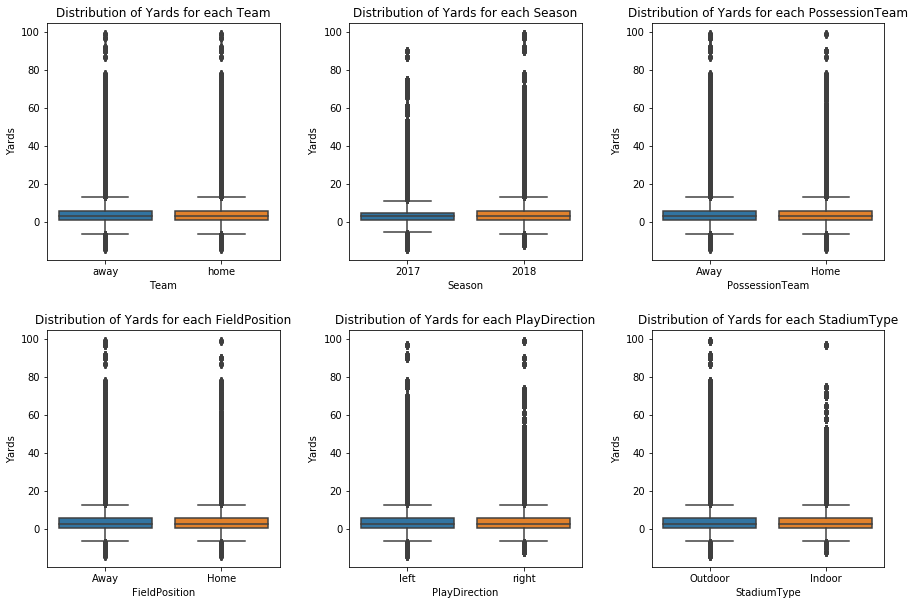

In [25]:
plot_boxplots(nfl, ['Team', 'Season', 'PossessionTeam',
                    'FieldPosition', 'PlayDirection', 'StadiumType'])

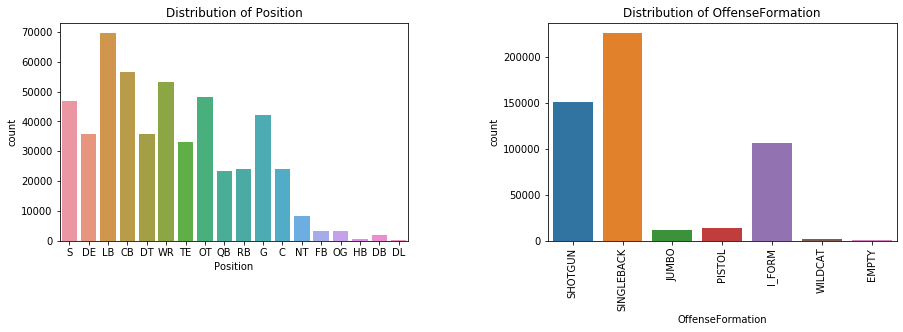

In [24]:
two_subplots(nfl, 'Position', 'OffenseFormation',
             (15, 4), rotate=True)

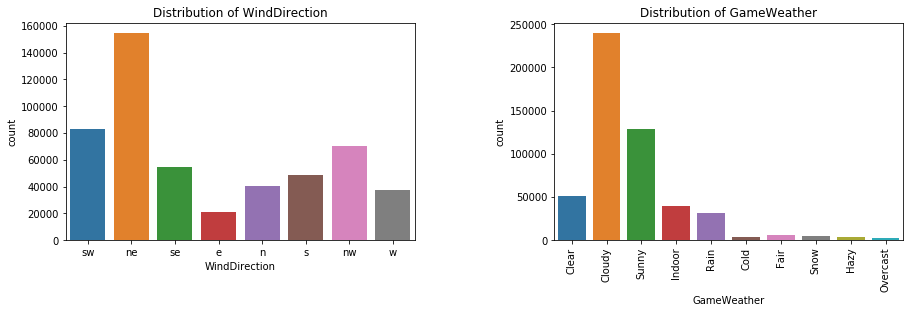

In [26]:
two_subplots(nfl, 'WindDirection', 'GameWeather',
             (15, 4), rotate=True)